In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier


from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import RandomOverSampler


import joblib

In [6]:
col_names =['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Class']
data_raw = pd.read_csv(r"D:\flower_iris_uc_ML\iris.data" , names = col_names)

In [7]:
data = data_raw.copy()

In [8]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data.shape

(150, 5)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Class          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
data.duplicated().sum()

np.int64(3)

In [12]:
data.drop_duplicates(inplace= True)

In [13]:
data.duplicated().sum()

np.int64(0)

In [14]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# feature target splittin

In [15]:
x = data.drop(['Class'], axis=1)
y = data['Class']

# Exploratory Data Analysis

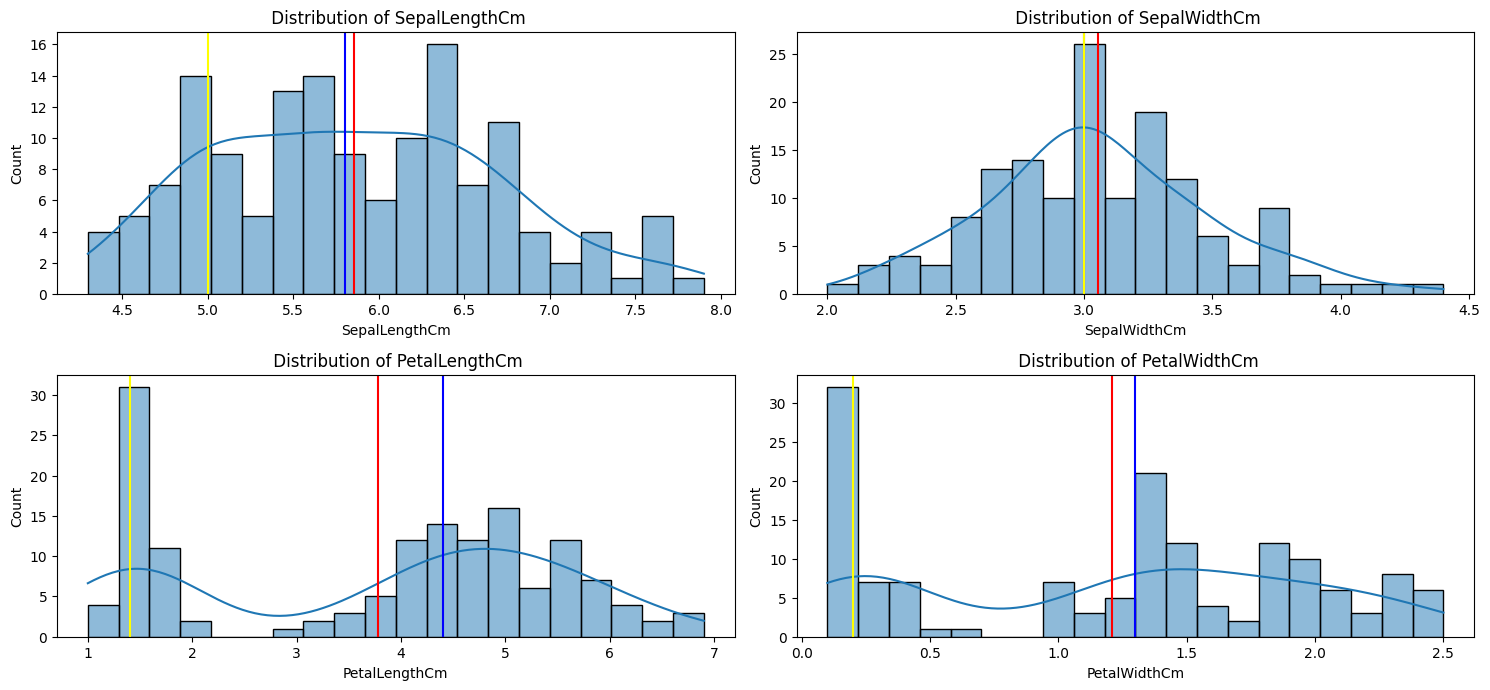

In [16]:
plt.figure(figsize=(15,10))
for i, col in enumerate(x):
    plt.subplot(3,2, i+1)
    sns.histplot(x[col], bins= 20, kde = True)
    mean = x[col].mean()
    plt.axvline(mean, color= "red")
    median = x[col].median()
    plt.axvline(median, color= "blue")
    mode = x[col].mode()[0]
    plt.axvline(mode, color= "yellow")
    plt.title(f" Distribution of {col}")
    plt.tight_layout()
plt.show()


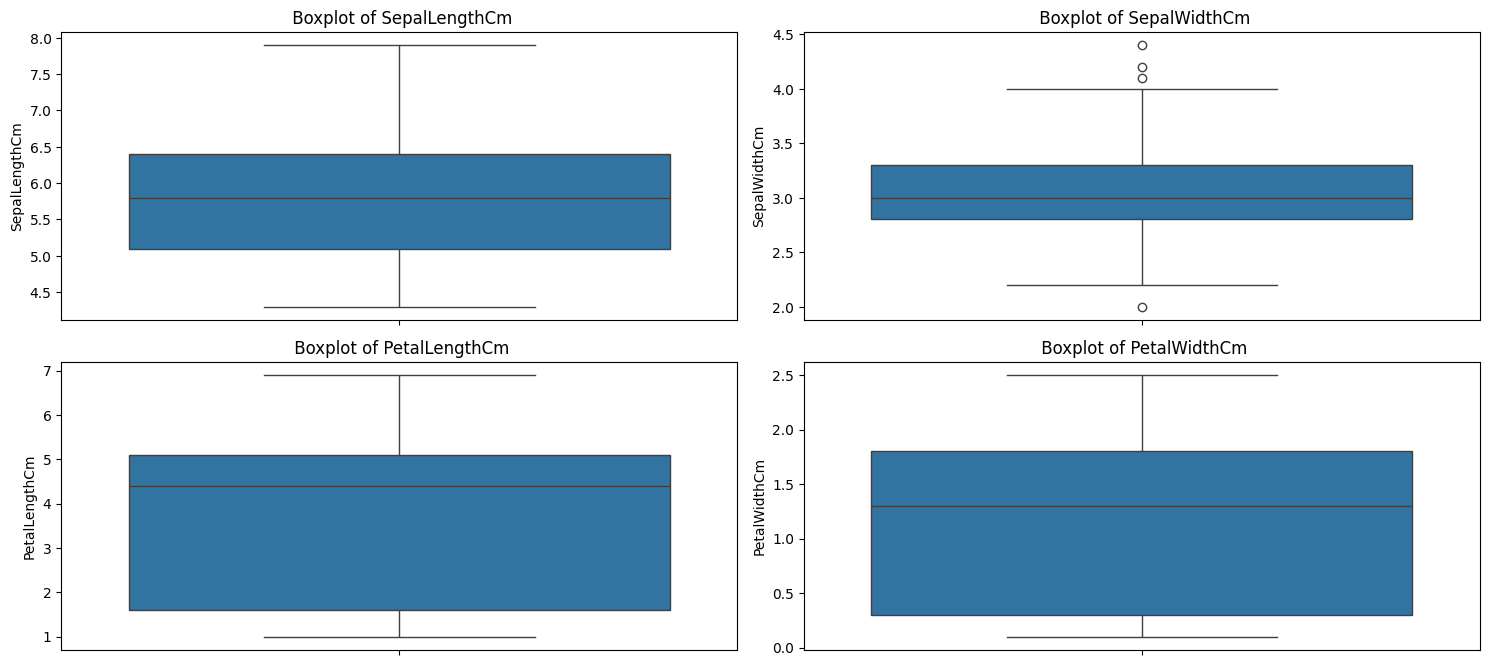

In [17]:
plt.figure(figsize=(15,10))
for i, col in enumerate(x):
    plt.subplot(3,2, i+1)
    sns.boxplot(x[col])
    plt.title(f" Boxplot of {col}")
    plt.tight_layout()
plt.show()


3.05578231292517


<Axes: ylabel='SepalWidthCm'>

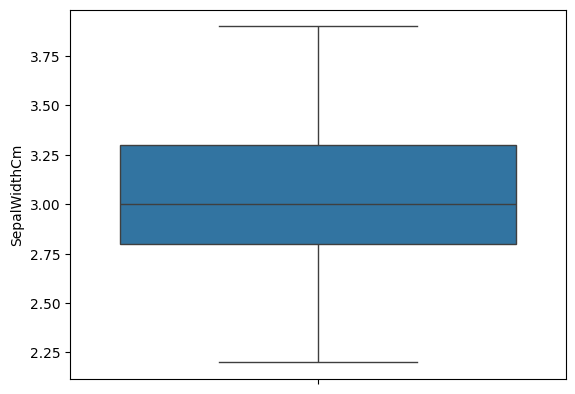

In [18]:
# Calculate the mean of the 'SepalWidthCm' column
item_visibility = data['SepalWidthCm'].mean()
print(item_visibility)

# Replace values not between 2 and 4 with the mean
data['SepalWidthCm'] = data['SepalWidthCm'].where((data['SepalWidthCm'] > 2) & (data['SepalWidthCm'] < 4), item_visibility)

# Plot a boxplot to visualize the distribution
sns.boxplot(data['SepalWidthCm'])


In [19]:
# Assuming 'Class' is the column you're interested in
unique_classes = y.unique()

# Print the unique values
for col in unique_classes:
    print(f"Class: {col}")
    # print(x[y == col].describe())
    # print("--------------------")


Class: Iris-setosa
Class: Iris-versicolor
Class: Iris-virginica


In [ ]:


# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'Class' column
data['Class'] = label_encoder.fit_transform(data['Class'])
print(data['Class'].unique())

[0 1 2]


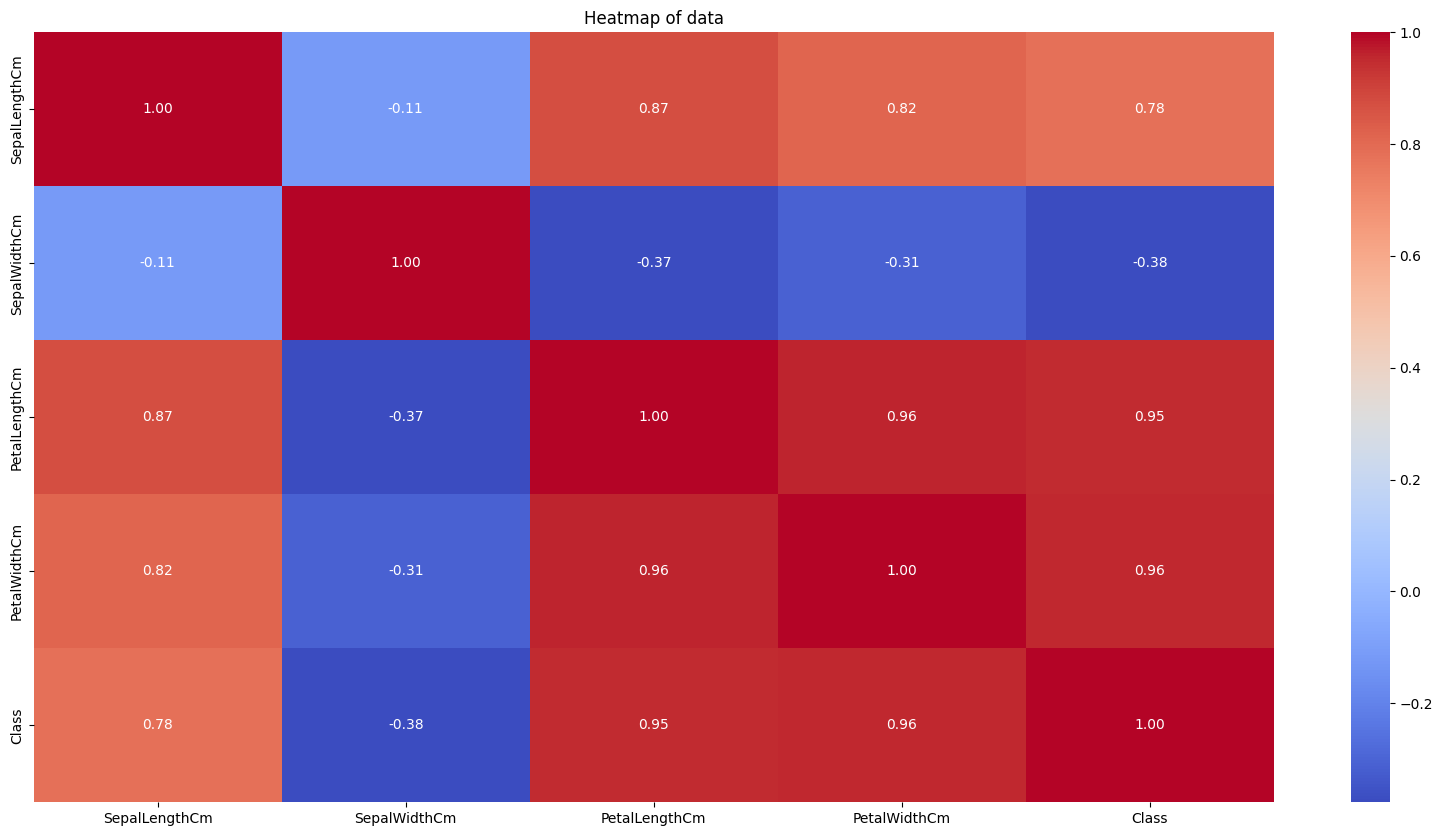

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), cmap='coolwarm', annot= True, fmt='.2f')
plt.title("Heatmap of data")
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [23]:
# Initialize RandomOverSampler to balance the classes
ros = RandomOverSampler(random_state=42)

# Fit and resample the training set
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Check the class distribution before and after balancing
print("Original class distribution in y_train:")
print(y_train.value_counts())

print("\nResampled class distribution in y_resampled:")
print(pd.Series(y_resampled).value_counts())

Original class distribution in y_train:
Class
Iris-versicolor    38
Iris-virginica     33
Iris-setosa        31
Name: count, dtype: int64

Resampled class distribution in y_resampled:
Class
Iris-versicolor    38
Iris-virginica     38
Iris-setosa        38
Name: count, dtype: int64


In [24]:
# 
## Initialize the model
# model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

# # Fit the model
# model.fit(X_train, y_train)

# # Predict on both training and test sets
# y_train_pred = model.predict(X_train)
# y_test_pred = model.predict(X_test)

# # Evaluate the accuracy on both training and test sets
# train_accuracy = accuracy_score(y_train, y_train_pred)
# test_accuracy = accuracy_score(y_test, y_test_pred)

# print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
# print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


In [25]:
# model = KNeighborsClassifier(n_neighbors=3)

# # Fit the model on the training set
# model.fit(X_train, y_train)

# # Predict on the training set
# y_train_pred = model.predict(X_train)

# # Predict on the test set
# y_test_pred = model.predict(X_test)

# # Evaluate the accuracy on both training and test sets
# train_accuracy = accuracy_score(y_train, y_train_pred)
# test_accuracy = accuracy_score(y_test, y_test_pred)

# print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
# print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

In [30]:
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training set
rf_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = rf_model.predict(X_train)

# Predict on the test set
y_test_pred = rf_model.predict(X_test)

# Evaluate the accuracy on both training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 100.00%
Test Accuracy: 95.56%


In [31]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Class, dtype: object

In [34]:

custom_input = (4.3, 3.6, 5.1, 2.3)

# Convert the input into a numpy array and reshape it
custom_input = np.array(custom_input).reshape(1, -1)  # Reshape to a 2D array

# Predict using the model (without scaling)
predicted_class = rf_model.predict(custom_input)

# Output the prediction
print(f"Predicted Class for custom input: {predicted_class[0]}")


Predicted Class for custom input: Iris-virginica


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [35]:
joblib.dump(rf_model, 'trained_model.joblib')

['trained_model.joblib']

In [41]:
# Check if the test sample exists in the training data
sample = np.array([[5.2, 2.9, 1.3, 0.3]])  # Example input
exists = (data.iloc[:, :-1] == sample).all(axis=1).any()

print("Seen by model?" , exists)


Seen by model? False


In [42]:
print(dict(enumerate(label_encoder.classes_)))


{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
